# Problem Statement

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They would want to venture into the movie creating business, only problem is they don't know what type of movies to create.

With the age of information, Microsoft can find out which movies are doing well in the box office and the highest grossing ones for smooth transition into the movie creating business.



# Solution

To aid Microsoft in this new business venture, I shall explore what types of films are currently doing well at the box office. I will analyze and translate the findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.



# Objectives

1. Identify what type of movies Microsoft should focus on in their new business venture.
2. Identify the turnover of movies and studios.
3. Identify if popular movies are the highest grossing movies.
4. Investigate the number of movies produced by a studio.

# Data Loading

Importing all the necessary libraries so as to get the data. Looking through the database 'im' to get a list of all the tables. 


In [93]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Create the connection
cnx = sqlite3.connect('im.db')

# create the dataframe from a query
df = pd.read_sql_query("SELECT * FROM sqlite_master", cnx)
df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [94]:
#print the first 5 records#
df.head()

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


In [95]:
#checking through the movie_ratings table#
q = """ select *
        from movie_ratings
        ;
        """
pd.read_sql(q, cnx)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [96]:
#checking through the movie_basics table#
q = """ select *
        from movie_basics
        ;
        """
pd.read_sql(q, cnx)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


Started with the movie_ratings table and then looked through the movie_basics but the data did not contain the information that can aid my analysis. I decided to drop the database and look through the csv and tsv files to see what it contains.

I went ahead and loaded all the files as shown below in order to see what each file contained.

There were four files total, 'tmdb.movies.csv', 'bom.movie_gross.csv.gz', 'tn.movie_budgets.csv.gz' and 'rt.movie_info.tsv.gz'.
I dropped the 'rt.movie_info.tsv.gz' file because after going through it I could not figure out what movie they were talking about and the id did not match any of the other files. The information it contained was not relevant to me.

This data was compiled over the period of 2010-2018
The first ten rows and columns are displayed as shown below:

In [97]:
#loading tmdb.movies.csv file#
genres = pd.read_csv('tmdb.movies.csv')
genres

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [98]:
#loading bom.movie_gross.csv.gz file#
movies_gross = pd.read_csv('bom.movie_gross.csv.gz')
movies_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [99]:
##loading tn.movie_budgets.csv.gz file#
movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [100]:
#loading rt.movie_info.tsv.gz file#
movies_info = pd.read_table('rt.movie_info.tsv.gz')
movies_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


# Data Understanding:

After combing through the four files, I decided to combine all the information I needed into one dataset so that I could start working on it to retrieve all the necessary information I needed for my data analysis

I will start with the movie_gross and genres table since they both have a common column 'title'. I will use inner join because it will return only the common titles in both tables. 

In [101]:
#combine movie_gross and genres on the common column 'title' using an inner join that will check through both tables and# 
#return a value#
newdfs= pd.merge(movies_gross, genres, on='title', how='inner')
newdfs

,title,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,2010,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,535700000,2010,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909
4,Iron Man 2,Par.,312400000.0,311500000,2010,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,The Escape,IFC,14000.0,NaN,2018,16803,"[53, 28]",459814,en,The Escape,0.600,2015-08-14,7.0,1
2699,The Escape,IFC,14000.0,NaN,2018,19053,"[53, 28]",417004,en,The Escape,1.176,2016-10-23,6.6,10
2700,Souvenir,Strand,11400.0,NaN,2018,18483,"[35, 18]",408258,fr,Souvenir,2.130,2016-09-08,5.8,14
2701,The Quake,Magn.,6200.0,NaN,2018,24107,[12],416194,no,Skjelvet,11.051,2018-12-14,6.7,81


Moving on to the next table, movie_budgets, I realized that the title and movie column were the same. So I will rename the title in the newly created dataframe to movie and proceed to do inner join with movie_budgets.

In [102]:
#now add the movie_budgets to the new df we created above.# 
#Since movie and title are common, I will change the column name 'movies' to 'title' in movie_budgets so that I combine them#
newdfs.rename(columns = {'title':'movie'}, inplace=True)

In [103]:
#checking to see if indeed the column 'title' has been changed to 'movies' and it indeed has
newdfs.columns

Index(['movie', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [104]:
#combine movie_budgets to the newdfs I had created earlier and this will be the dataset I will be working on.#
studiosdfs= pd.merge(newdfs, movie_budgets, on="movie", how='inner')
studiosdfs

,movie,studio,domestic_gross_x,foreign_gross,year,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,25148,"[28, 12, 16]",332718,en,Bilal: A New Breed of Hero,2.707,2018-02-02,6.8,54,100,"Feb 2, 2018","$30,000,000","$490,973","$648,599"
1391,Mandy,RLJ,1200000.0,NaN,2018,20499,[18],499658,en,Mandy,0.600,2016-01-24,3.5,2,71,"Sep 14, 2018","$6,000,000","$1,214,525","$1,427,656"
1392,Mandy,RLJ,1200000.0,NaN,2018,23952,"[28, 53, 27, 14, 9648]",460885,en,Mandy,16.240,2018-09-13,6.2,618,71,"Sep 14, 2018","$6,000,000","$1,214,525","$1,427,656"
1393,Lean on Pete,A24,1200000.0,NaN,2018,20908,"[18, 12]",407890,en,Lean on Pete,9.307,2018-04-06,6.9,133,13,"Apr 6, 2018","$8,000,000","$1,163,056","$2,455,027"


# Data Cleaning:

I have the final dataset to do my analysis.
Starting with checking the columns, datatype and info.

In [105]:
studiosdfs.columns   #check the columns I have and then remove the ones I do not need.#
studiosdfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1395 non-null   object 
 1   studio             1394 non-null   object 
 2   domestic_gross_x   1393 non-null   float64
 3   foreign_gross      1200 non-null   object 
 4   year               1395 non-null   int64  
 5   Unnamed: 0         1395 non-null   int64  
 6   genre_ids          1395 non-null   object 
 7   id_x               1395 non-null   int64  
 8   original_language  1395 non-null   object 
 9   original_title     1395 non-null   object 
 10  popularity         1395 non-null   float64
 11  release_date_x     1395 non-null   object 
 12  vote_average       1395 non-null   float64
 13  vote_count         1395 non-null   int64  
 14  id_y               1395 non-null   int64  
 15  release_date_y     1395 non-null   object 
 16  production_budget  1395 

Dropping columns that are not relevant to my analysis.

In [106]:
studiosdfs.drop(studiosdfs.columns[[2,5,6,7,8,9,11,14,15]], axis=1, inplace=True)

Dropping duplicates rows. 

In [107]:
#check for duplicates and drop them#
studiosdfs.drop_duplicates(inplace=True)

In [108]:
studiosdfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1271 entries, 0 to 1393
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1271 non-null   object 
 1   studio             1270 non-null   object 
 2   foreign_gross      1097 non-null   object 
 3   year               1271 non-null   int64  
 4   popularity         1271 non-null   float64
 5   vote_average       1271 non-null   float64
 6   vote_count         1271 non-null   int64  
 7   production_budget  1271 non-null   object 
 8   domestic_gross_y   1271 non-null   object 
 9   worldwide_gross    1271 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 109.2+ KB


Next step, checking for missing values. 

In [109]:
#check for missing values to know what we are going to do with them first#
studiosdfs.isnull().sum()

movie                  0
studio                 1
foreign_gross        174
year                   0
popularity             0
vote_average           0
vote_count             0
production_budget      0
domestic_gross_y       0
worldwide_gross        0
dtype: int64

Foreign gross has a total of 174 missing records. I will drop the column since I have production_budget, domestic_gross_y and worldwide_gross for financial analysis.

In [110]:
#dropping the foreign_gross column#
studiosdfs.drop(studiosdfs.columns[[2]], axis=1, inplace=True)

Removing all the commas and special characters in the production_budget, domestic_gross_y and worldwide_gross as they have categorical data that can be changed to numerical columns for further analysis.

In [111]:
#remove all the commas and $ so that you do not have an error when changing the string elements to int#
#remove all the commas and $ so that you do not have an error when changing the string elements to int#
studiosdfs = studiosdfs.replace(',','', regex=True)
studiosdfs['production_budget'] = studiosdfs['production_budget'].str.replace(r'$', '', regex=True)
studiosdfs['domestic_gross_y'] = studiosdfs['domestic_gross_y'].str.replace(r'$', '', regex=True)
studiosdfs['worldwide_gross'] = studiosdfs['worldwide_gross'].str.replace(r'$', '', regex=True)


In [112]:
#I will change the datatype of production_budget, domestic_gross_y and worldwide_gross# 
#from string to integer so that we can do some computations with them#

studiosdfs['domestic_gross_y'] = studiosdfs['domestic_gross_y'].astype('int64')
studiosdfs['worldwide_gross'] = studiosdfs['worldwide_gross'].astype('int64')
studiosdfs['production_budget'] = studiosdfs['production_budget'].astype('int64')

# Data Analysis

Checking the cleaned dataset and looking at the first ten and last ten records. I can then begin exploring the data to get different insights on it.

In [113]:
studiosdfs

,movie,studio,year,popularity,vote_average,vote_count,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,2010,24.445,7.7,8340,200000000,415004880,1068879522
1,Inception,WB,2010,27.920,8.3,22186,160000000,292576195,835524642
2,Shrek Forever After,P/DW,2010,15.041,6.1,3843,165000000,238736787,756244673
3,The Twilight Saga: Eclipse,Sum.,2010,20.340,6.0,4909,68000000,300531751,706102828
4,Iron Man 2,Par.,2010,28.515,6.8,12368,170000000,312433331,621156389
...,...,...,...,...,...,...,...,...,...
1389,Gotti,VE,2018,10.034,5.2,231,10000000,4286367,6089100
1390,Bilal: A New Breed of Hero,VE,2018,2.707,6.8,54,30000000,490973,648599
1391,Mandy,RLJ,2018,0.600,3.5,2,6000000,1214525,1427656
1392,Mandy,RLJ,2018,16.240,6.2,618,6000000,1214525,1427656


In [114]:
#last ten records of the dataframe#
studiosdfs.tail(10)

,movie,studio,year,popularity,vote_average,vote_count,production_budget,domestic_gross_y,worldwide_gross
1384,Kin,LGF,2018,23.805,6.2,289,30000000,5718096,10096821
1385,Can You Ever Forgive Me?,FoxS,2018,17.604,6.9,450,10000000,8803865,11752387
1386,Suspiria,Amazon,2018,16.925,7.0,752,20000000,2483472,7034615
1387,The Hurricane Heist,ENTMP,2018,13.335,5.4,476,40000000,6115824,30963684
1388,Destroyer,Annapurna,2018,17.815,5.9,176,9000000,1533324,3681096
1389,Gotti,VE,2018,10.034,5.2,231,10000000,4286367,6089100
1390,Bilal: A New Breed of Hero,VE,2018,2.707,6.8,54,30000000,490973,648599
1391,Mandy,RLJ,2018,0.600,3.5,2,6000000,1214525,1427656
1392,Mandy,RLJ,2018,16.240,6.2,618,6000000,1214525,1427656
1393,Lean on Pete,A24,2018,9.307,6.9,133,8000000,1163056,2455027


# Data Exploration and Visualization

Looking for the highest grossing films.

In [115]:
studiosdfs_sort = studiosdfs.sort_values(by=["worldwide_gross"], ascending=False)
df_studio=studiosdfs_sort.head(15)


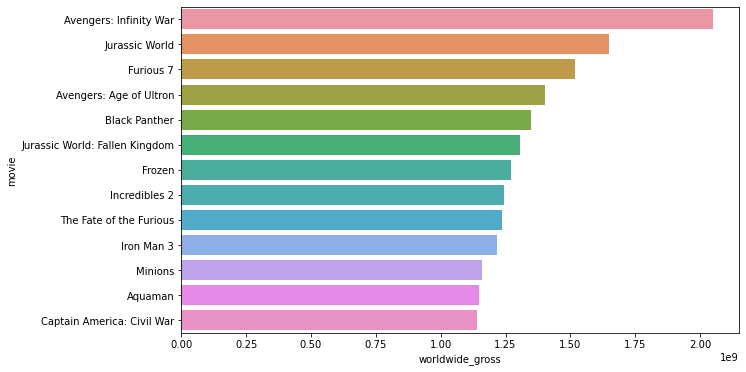

In [116]:
#checking to see the top grossing films#
fig, axes = plt.subplots(figsize=(10, 6))
sns.barplot(y=df_studio['movie'],x=df_studio['worldwide_gross'], ax=axes)
plt.show()

From the graph, Avengers: Infinity War was the highest grossing movie for the period of 2010-2018 and Jurassic World came second while Furious 7 was going strong in third place.

Checking if the most popular movies are also the highest grossing ones.

In [117]:
studiosdfs_sort = studiosdfs.sort_values(by=["popularity"], ascending=False)
df_studio=studiosdfs_sort.head(10)

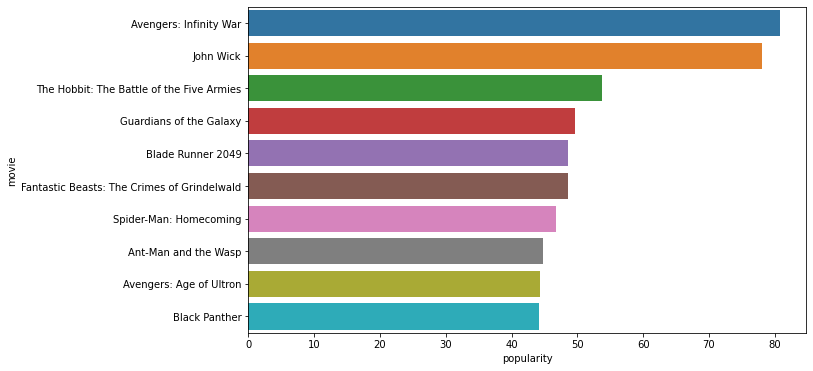

In [118]:
#checking to see the most poplular movies accordint to the popularity count# 
fig, axes = plt.subplots(figsize=(10, 6))
sns.barplot(y=df_studio['movie'],x=df_studio['popularity'], ax=axes)
plt.show()

Comparing popularity vs gross by movie, popularity does not translate to sales meaning a movie can be popular but will not gross more. Avengers Infinity was the most popular and also the highest grossing but that was not the case with John Wick, The hobbit and Guardians of the glalaxy.


Creating a new feature, 'Revenue', to look at the profit/loss margins of the studios.

In [119]:
#checking the profit/loss margins by finding the difference between production and income#
studiosdfs['Revenue']= (studiosdfs['domestic_gross_y']+studiosdfs['worldwide_gross']) - studiosdfs['production_budget']
studiosdfs['Revenue']

0       1283884402
1        968100837
2        829981460
3        938634579
4        763589720
           ...    
1389        375467
1390     -28860428
1391      -3357819
1392      -3357819
1393      -4381917
Name: Revenue, Length: 1271, dtype: int64

Looking for the top 10 highest grossing studios and the top 10 least grossing studios.

In [120]:
# top 10 highest grossing studios#
studiosdfs_sort = studiosdfs.sort_values(by=["Revenue"], ascending=False)
df_studio=studiosdfs_sort.head(10)


In [121]:
#Sum of all the studio revenue#
studiosdfs1=studiosdfs.groupby(['studio'])[['Revenue']].sum()
high_revenue=studiosdfs1.nlargest(10,'Revenue')
high_revenue.head()

,Revenue
studio,
BV,42254040996
Uni.,34681326566
Fox,28554722265
WB,24454678187
Sony,19550987246


<BarContainer object of 10 artists>

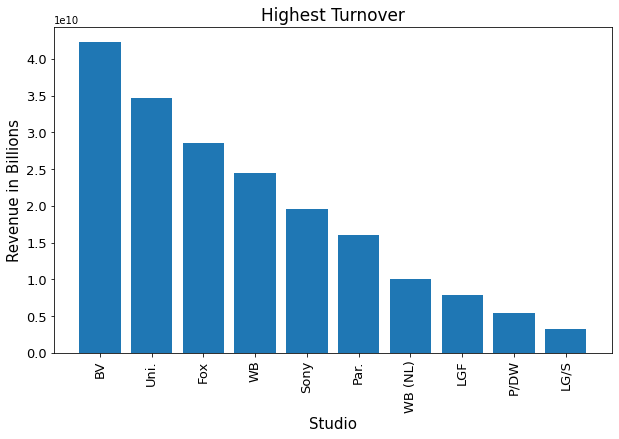

In [122]:
# plotting top 10 highest grossing studios#
plt.figure(figsize=(10,6))
plt.title('Highest Turnover',fontsize=17)
plt.ylabel('Revenue in Billions',fontsize=15)
plt.xticks(fontsize=13,rotation=90)
plt.xlabel('Studio',fontsize=15)
plt.yticks(fontsize=13)
plt.bar(high_revenue.index,high_revenue['Revenue'])

The above graph represents the top 10 highest grossing studios. BV was the highest grossing studio with a revenue amount of 42,254,040,996. With Uni studio coming in second with 34,681,326,566 and Fox a distant third having 28,554,722,265. This amounts are from 2010 to 2018.

In [123]:
#top 10 least grossing studios#
studiosdfs_sort = studiosdfs.sort_values(by=["Revenue"], ascending=True)
df_studio=studiosdfs_sort.head(10)


In [124]:
#Sum of all the studio revenue#
studiosdfs2=studiosdfs.groupby(['studio'])[['Revenue']].sum()
low_revenue=studiosdfs2.nsmallest(10,'Revenue')
low_revenue.head()

,Revenue
studio,
Free,-76391445
Magn.,-75409318
Anch.,-46011759
KE,-35810094
VE,-31642334


<BarContainer object of 10 artists>

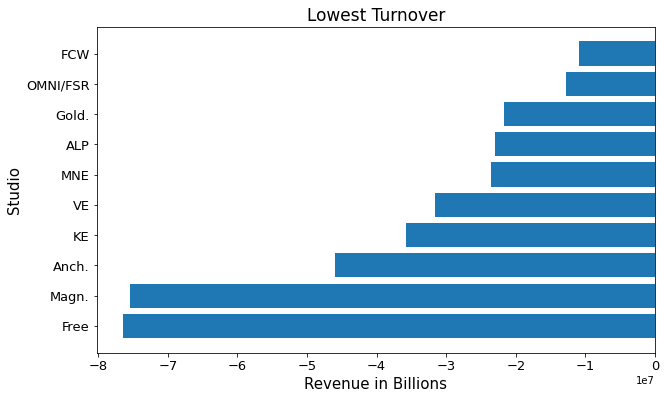

In [125]:
# plotting top 10 least grossing studios#
plt.figure(figsize=(10,6))
plt.title('Lowest Turnover',fontsize=17)
plt.xlabel('Revenue in Billions',fontsize=15)
plt.yticks(fontsize=13)
plt.ylabel('Studio',fontsize=15)
plt.xticks(fontsize=13)
plt.barh(low_revenue.index,low_revenue['Revenue'])

Free was the studio that garnered the most loss with a -76,391,445 with Magn studio coming a close second with -75,409,318. Anch was a distand third with -46,011,759

The difference between the top 10 highest grossing and the top 10 least grossing is very big. What could the reason be? Could it be because of the number of movies produced by a specific studio? I will find out by doing a simple count.

First, I did a simple categorizing where I categorized movies by their studio to find the count of movies made by each studio.
Then I plotted it in a graph so that we could easily see which studios had the highest count and which had the lowest counts.

<AxesSubplot:title={'center':'Count of movies per studio'}, ylabel='Count'>

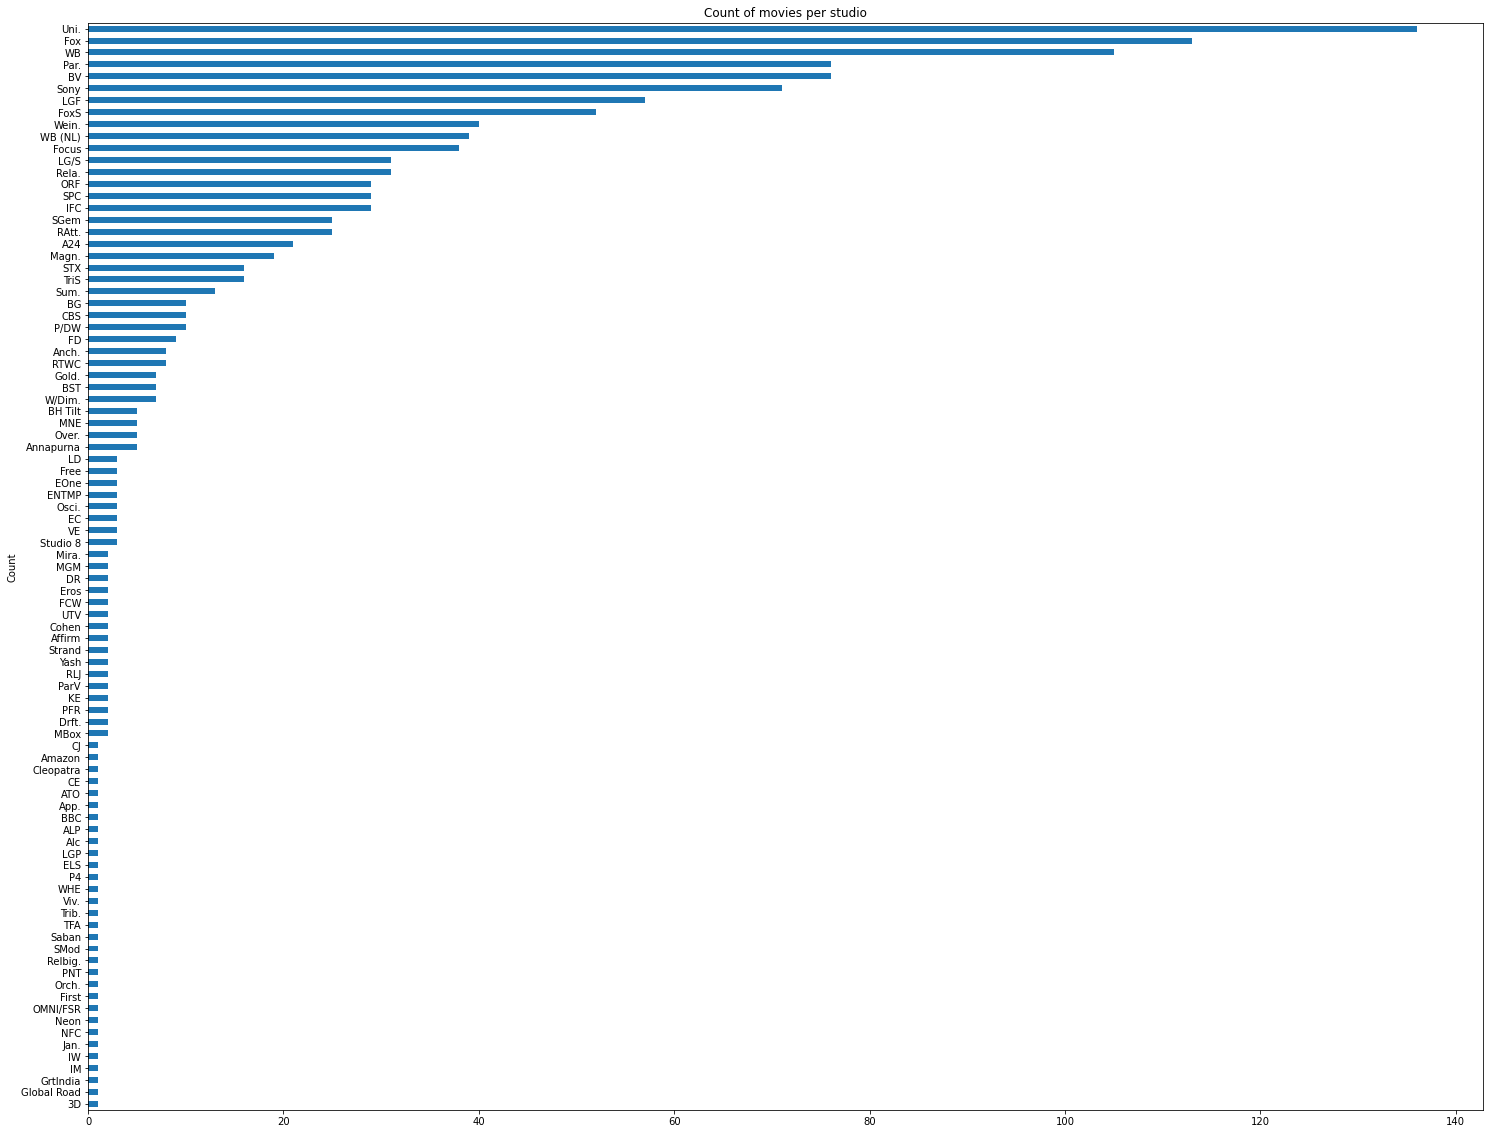

In [78]:
#I did a groupby to categorize movies by the studios that produced them#
df_groups = studiosdfs.groupby(['studio'])['movie'].count().sort_values()
df_groups.plot(kind='barh', title='Count of movies per studio',
               ylabel='Studio', xlabel='Count', figsize=(25,20))


In [131]:
studiosdfs3=studiosdfs.groupby(['studio'])[['movie']].count().sort_values('movie', ascending=False).tail(10)
studiosdfs3

,movie
studio,
Global Road,1
GrtIndia,1
IM,1
IW,1
Jan.,1
NFC,1
Neon,1
OMNI/FSR,1
Orch.,1


In [127]:
studiosdfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1271 entries, 0 to 1393
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1271 non-null   object 
 1   studio             1270 non-null   object 
 2   year               1271 non-null   int64  
 3   popularity         1271 non-null   float64
 4   vote_average       1271 non-null   float64
 5   vote_count         1271 non-null   int64  
 6   production_budget  1271 non-null   int64  
 7   domestic_gross_y   1271 non-null   int64  
 8   worldwide_gross    1271 non-null   int64  
 9   Revenue            1271 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 109.2+ KB


Most of the top 10 grossing movies had higher movie counts as compared to the top 10 least grossing. The higher the count of movies produced by a studio, the higher its revenue. 
Hence I can say that the number of movies produced affects the gross profit/loss made by a studio.

Analyzing the least grossing movies to see which studio produced them and what features they had.

In [73]:
#checking the least grossing movies, then look at which studio produced them#
studiosdfs_sort = studiosdfs.sort_values(by=["worldwide_gross"], ascending=True)
df_studio=studiosdfs_sort.head(30)


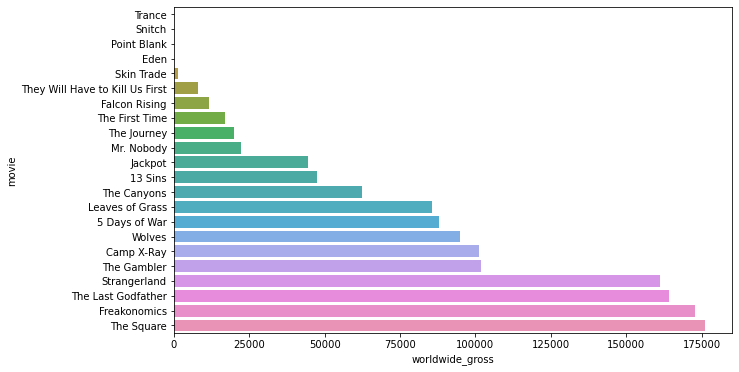

In [74]:
#checking to see the least grossing films#
fig, axes = plt.subplots(figsize=(10, 6))
sns.barplot(y=df_studio['movie'],x=df_studio['worldwide_gross'], ax=axes)
plt.show()

These are the least grossing films. There are no superhero movies or children animations so it is clear to say that those are the types of movies that are doing well in the box office.

I decided to see on average which studios grossed more.

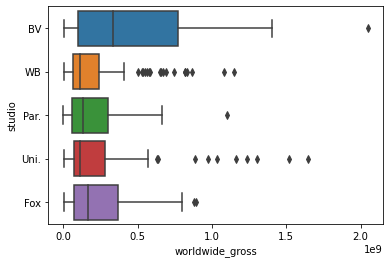

In [75]:
#Plot showing the average money made per studio#
top_studios = (
   studiosdfs["studio"].value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="studio",
    x="worldwide_gross",
    data=studiosdfs[studiosdfs["studio"].isin(top_studios)],
    orient="h",
);

On average BV studio is making huge money on average per movie and Fox comes in second then Paramount Studio, this tallies with the top 10 highest grossing studios.

The data has outliers that represent the movies that had raked above average for each of the studio. I will retain the outliers since the data they contain is crucial for analysis.

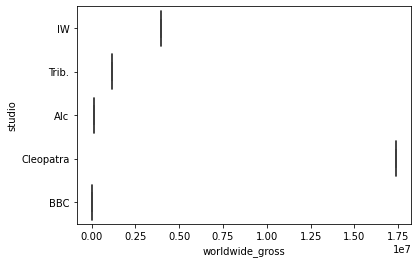

In [76]:
bottom_studios = (
   studiosdfs["studio"].value_counts().sort_values(ascending=False).tail(5).index.values
)
sns.boxplot(
    y="studio",
    x="worldwide_gross",
    data=studiosdfs[studiosdfs["studio"].isin(bottom_studios)],
    orient="h",
);

On average WHE AND A|c are making almost no money on average and this tallies with the movie count because they had fewer movies as compared to the top grossing ones. So we can safely say that producing many movies is a sure way to be among the top earners.

# Conclusion:


a) The top grossing movies belong to superhero/action and animation category as shown in the top 10 highest grossing movies.
Avengers:Infinity War a superhero movie is at the top, Avengers:Age of Ultron is 4th in the top 10 highest grossing, Black Panther at number 5 and Iron Man 3 at number 8.

Jurassic World an action movie is at number 2 with its sequel Jurassic World: Fallen Kingdom at number 6. Furious 7 an action film too is at number 7.

Children Animation movies also feature in the top 10 highest grossing film with Frozen at number 7, Incredibles 2 at number 8.

b) Popularity of a movie does not translate to sales. Out of the top 10 most popular movies, only 3 featured in the top 10 highest grossing films and they were all superhero movies.

c) The number of movies a studio produces affects its overall revenue. The more movies a studio makes, the more it garners revenue as shown by the top 10 studios.



# Recommendation:


I would recommend Microsoft to create mostly superhero themed movies and children animations since from the analysis, they do well in the box office. 

Producing alot of movies per each fiscal quarter would mean Microsoft will generate more revenue since the more movies produced, the more money made.

